In [17]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
#import seaborn as sns

radish = pd.read_csv('C:/sa/week/radish_week.csv')

radish.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),"1,132",1.657143,-3.242857,7.628571,0.442857,1061.77,115.0,"57,638,865",480,"125,853,180","27,020","1,314",82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),"1,062",-2.700000,-7.728571,2.900000,0.000000,1061.80,115.0,"57,638,865",480,"125,853,180","27,020","1,314",82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),"1,060",-1.128571,-5.742857,4.057143,0.414286,1080.35,115.0,"57,638,865",480,"125,853,180","27,020","1,314",82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),992,-1.000000,-4.314286,9.100000,0.414286,1081.31,115.0,"57,638,865",480,"125,853,180","27,020","1,314",82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),"1,007",2.671429,-2.285714,8.085714,1.071429,1075.00,97.0,"48,935,061",169,"51,969,740","27,020","1,314",83.296


In [18]:
radish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week              557 non-null    object 
 1   retail price      557 non-null    object 
 2   avgTemp           557 non-null    float64
 3   minTemp           557 non-null    float64
 4   maxTemp           557 non-null    float64
 5   rainfall          557 non-null    float64
 6   exchange rate     557 non-null    float64
 7   export volume     552 non-null    float64
 8   export value      552 non-null    object 
 9   import volume     517 non-null    object 
 10  import value      517 non-null    object 
 11  production        522 non-null    object 
 12  cultivation area  522 non-null    object 
 13  market price      557 non-null    float64
dtypes: float64(7), object(7)
memory usage: 61.1+ KB


In [19]:
for column in radish.columns:
    if radish[column].dtype == 'object':
        radish[column] = radish[column].str.replace(',','')

for column in radish.select_dtypes(include=['object']).columns:
    if column != 'week':
        radish[column] = pd.to_numeric(radish[column])

#radish = radish.replace(0,np.nan)

radish.head()

,week,retail price,avgTemp,minTemp,maxTemp,rainfall,exchange rate,export volume,export value,import volume,import value,production,cultivation area,market price
0,01월 1주 (2014.01.02 ~ 2014.01.08),1132,1.657143,-3.242857,7.628571,0.442857,1061.77,115.0,57638865.0,480.0,125853180.0,27020.0,1314.0,82.358
1,01월 2주 (2014.01.09 ~ 2014.01.15),1062,-2.700000,-7.728571,2.900000,0.000000,1061.80,115.0,57638865.0,480.0,125853180.0,27020.0,1314.0,82.358
2,01월 3주 (2014.01.16 ~ 2014.01.22),1060,-1.128571,-5.742857,4.057143,0.414286,1080.35,115.0,57638865.0,480.0,125853180.0,27020.0,1314.0,82.358
3,01월 4주 (2014.01.23 ~ 2014.01.29),992,-1.000000,-4.314286,9.100000,0.414286,1081.31,115.0,57638865.0,480.0,125853180.0,27020.0,1314.0,82.358
4,02월 1주 (2014.02.03 ~ 2014.02.05),1007,2.671429,-2.285714,8.085714,1.071429,1075.00,97.0,48935061.0,169.0,51969740.0,27020.0,1314.0,83.296


In [20]:
nan_var = radish.isna().sum()/len(radish)

nan_var[nan_var>0.5]

Series([], dtype: float64)

In [21]:
radish.isna().sum()

week                 0
retail price         0
avgTemp              0
minTemp              0
maxTemp              0
rainfall             0
exchange rate        0
export volume        5
export value         5
import volume       40
import value        40
production          35
cultivation area    35
market price         0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer

num_cols = radish.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
radish[num_cols] = imputer.fit_transform(radish[num_cols])

radish.isna().sum()

week                0
retail price        0
avgTemp             0
minTemp             0
maxTemp             0
rainfall            0
exchange rate       0
export volume       0
export value        0
import volume       0
import value        0
production          0
cultivation area    0
market price        0
dtype: int64

In [23]:
X= radish[['exchange rate','avgTemp','maxTemp','minTemp','rainfall','import volume ','import value','production',
          'cultivation area', 'market price']]
y =radish['retail price']

X_names = X.columns
X_names

Index(['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'import volume ', 'import value', 'production', 'cultivation area',
       'market price'],
      dtype='object')

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression


sel_fr = SelectKBest(f_regression, k=4).fit(X, y)
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['exchange rate', 'avgTemp', 'minTemp', 'market price']


In [25]:

# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')


sfs.fit(X,y)


X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')


X_selected_names = ['exchange rate', 'rainfall', 'cultivation area']


In [26]:
# estimator = SVR(kernel="linear")
from sklearn.feature_selection import RFE ,RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

# 선택 특징 변환
X_selected = selector.transform(X)
# 선택된 이름 가져오기
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

# 출력
print(f'{X_selected_names = }')
print()

X_selected_names = ['avgTemp', 'maxTemp', 'minTemp']



In [27]:
#rfecv

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['exchange rate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'production', 'cultivation area', 'market price']


### LSTM

In [28]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = radish[['avgTemp', 'export volume ', 'market price', 'export value']].values
y = radish[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    lstm_model = Sequential()
    lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.1))
    lstm_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    lstm_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=110, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = lstm_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')



Fold 1


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/110
45/45 - 3s - 60ms/step - loss: 0.0539 - mae: 0.1848 - val_loss: 0.0402 - val_mae: 0.1662
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0465 - mae: 0.1745 - val_loss: 0.0397 - val_mae: 0.1680
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0429 - mae: 0.1687 - val_loss: 0.0331 - val_mae: 0.1320
Epoch 4/110
45/45 - 0s - 4ms/step - loss: 0.0358 - mae: 0.1521 - val_loss: 0.0350 - val_mae: 0.1369
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0377 - mae: 0.1528 - val_loss: 0.0312 - val_mae: 0.1462
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0363 - mae: 0.1488 - val_loss: 0.0284 - val_mae: 0.1349
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0309 - mae: 0.1383 - val_loss: 0.0343 - val_mae: 0.1397
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0305 - mae: 0.1357 - val_loss: 0.0268 - val_mae: 0.1296
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0286 - mae: 0.1295 - val_loss: 0.0269 - val_mae: 0.1294
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0291 - mae: 0.1302 - val_loss: 0.0250 - val_mae: 0.124

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 57ms/step - loss: 0.0591 - mae: 0.1942 - val_loss: 0.0423 - val_mae: 0.1765
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0426 - mae: 0.1694 - val_loss: 0.0446 - val_mae: 0.1877
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0391 - mae: 0.1597 - val_loss: 0.0344 - val_mae: 0.1554
Epoch 4/110
45/45 - 0s - 4ms/step - loss: 0.0345 - mae: 0.1472 - val_loss: 0.0343 - val_mae: 0.1559
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0347 - mae: 0.1456 - val_loss: 0.0332 - val_mae: 0.1533
Epoch 6/110
45/45 - 0s - 6ms/step - loss: 0.0329 - mae: 0.1404 - val_loss: 0.0434 - val_mae: 0.1829
Epoch 7/110
45/45 - 0s - 6ms/step - loss: 0.0323 - mae: 0.1413 - val_loss: 0.0357 - val_mae: 0.1598
Epoch 8/110
45/45 - 0s - 4ms/step - loss: 0.0306 - mae: 0.1351 - val_loss: 0.0295 - val_mae: 0.1392
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0287 - mae: 0.1301 - val_loss: 0.0489 - val_mae: 0.1899
Epoch 10/110
45/45 - 0s - 4ms/step - loss: 0.0288 - mae: 0.1327 - val_loss: 0.0273 - val_mae: 0.1323
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 59ms/step - loss: 0.0514 - mae: 0.1801 - val_loss: 0.0471 - val_mae: 0.1832
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0426 - mae: 0.1677 - val_loss: 0.0436 - val_mae: 0.1758
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0405 - mae: 0.1573 - val_loss: 0.0387 - val_mae: 0.1506
Epoch 4/110
45/45 - 0s - 4ms/step - loss: 0.0355 - mae: 0.1460 - val_loss: 0.0463 - val_mae: 0.1583
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0343 - mae: 0.1450 - val_loss: 0.0333 - val_mae: 0.1432
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0345 - mae: 0.1463 - val_loss: 0.0360 - val_mae: 0.1421
Epoch 7/110
45/45 - 0s - 4ms/step - loss: 0.0341 - mae: 0.1421 - val_loss: 0.0339 - val_mae: 0.1583
Epoch 8/110
45/45 - 0s - 5ms/step - loss: 0.0333 - mae: 0.1449 - val_loss: 0.0291 - val_mae: 0.1336
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0314 - mae: 0.1396 - val_loss: 0.0398 - val_mae: 0.1455
Epoch 10/110
45/45 - 0s - 4ms/step - loss: 0.0316 - mae: 0.1402 - val_loss: 0.0359 - val_mae: 0.1382
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 56ms/step - loss: 0.0504 - mae: 0.1874 - val_loss: 0.0384 - val_mae: 0.1636
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0428 - mae: 0.1688 - val_loss: 0.0322 - val_mae: 0.1335
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0395 - mae: 0.1575 - val_loss: 0.0316 - val_mae: 0.1329
Epoch 4/110
45/45 - 0s - 4ms/step - loss: 0.0335 - mae: 0.1440 - val_loss: 0.0321 - val_mae: 0.1272
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0349 - mae: 0.1440 - val_loss: 0.0295 - val_mae: 0.1261
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0325 - mae: 0.1407 - val_loss: 0.0286 - val_mae: 0.1299
Epoch 7/110
45/45 - 0s - 4ms/step - loss: 0.0301 - mae: 0.1366 - val_loss: 0.0326 - val_mae: 0.1420
Epoch 8/110
45/45 - 0s - 4ms/step - loss: 0.0338 - mae: 0.1445 - val_loss: 0.0289 - val_mae: 0.1248
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0306 - mae: 0.1377 - val_loss: 0.0318 - val_mae: 0.1495
Epoch 10/110
45/45 - 0s - 4ms/step - loss: 0.0283 - mae: 0.1321 - val_loss: 0.0261 - val_mae: 0.1226
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 4s - 84ms/step - loss: 0.0506 - mae: 0.1791 - val_loss: 0.0475 - val_mae: 0.1850
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0407 - mae: 0.1632 - val_loss: 0.0430 - val_mae: 0.1680
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0371 - mae: 0.1529 - val_loss: 0.0372 - val_mae: 0.1601
Epoch 4/110
45/45 - 0s - 4ms/step - loss: 0.0337 - mae: 0.1443 - val_loss: 0.0394 - val_mae: 0.1485
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0338 - mae: 0.1444 - val_loss: 0.0339 - val_mae: 0.1404
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0302 - mae: 0.1361 - val_loss: 0.0331 - val_mae: 0.1387
Epoch 7/110
45/45 - 0s - 4ms/step - loss: 0.0290 - mae: 0.1308 - val_loss: 0.0345 - val_mae: 0.1365
Epoch 8/110
45/45 - 0s - 4ms/step - loss: 0.0285 - mae: 0.1332 - val_loss: 0.0330 - val_mae: 0.1339
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0291 - mae: 0.1326 - val_loss: 0.0313 - val_mae: 0.1408
Epoch 10/110
45/45 - 0s - 5ms/step - loss: 0.0276 - mae: 0.1275 - val_loss: 0.0297 - val_mae: 0.1343
Epoch 11/1

In [29]:
import numpy as np
import pandas as pd

def predict_future_weeks_extended(model, initial_data, scalerX, scalerY, weeks=13):
    predictions = []
    
    # 데이터를 모델 입력 형식으로 정규화하고 3D로 변형
    current_data = scalerX.transform(initial_data).reshape((1, initial_data.shape[1], 1))
    
    for week in range(weeks):
        # 모델을 사용해 예측
        predicted_scaled = model.predict(current_data)
        predicted_price = scalerY.inverse_transform(predicted_scaled).flatten()[0]
        
        # 예측 결과 저장
        predictions.append(predicted_price)
        
        # 다음 주차 예측을 위한 입력 데이터 갱신
        current_data = np.append(current_data[:, 1:], predicted_scaled.reshape(1, 1, 1), axis=1)
    
    return predictions

# 예측을 100번 수행하고 평균값 계산
num_predictions = 100
all_predictions = []

# 초기 데이터 설정 (무 관련 데이터)
initial_data = radish[['avgTemp', 'export volume ', 'market price', 'export value']].values[-1].reshape(1, -1)

for _ in range(num_predictions):
    predicted_prices = predict_future_weeks_extended(lstm_model, initial_data, scalerX, scalerY, weeks=13)
    all_predictions.append(predicted_prices)

# numpy 배열로 변환하여 평균값 계산
all_predictions = np.array(all_predictions)
average_predictions = np.mean(all_predictions, axis=0)

# 평균 예측 결과 출력
average_predictions_df = pd.DataFrame(average_predictions, columns=['Average Predicted Retail Price'])
average_predictions_df.index = pd.date_range(start='2024-09-01', periods=13, freq='W-SUN')
print(average_predictions_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [ ]:
# 4. Loss 그래프
plt.figure(figsize=(20, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### GRU

In [42]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 데이터 준비
X = radish[['avgTemp', 'export volume ', 'market price', 'export value']].values
y = radish[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    gru_model = Sequential()
    gru_model.add(GRU(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    gru_model.add(Dropout(0.1))
    gru_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    gru_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=110, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = gru_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/110


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 55ms/step - loss: 0.0508 - mae: 0.1819 - val_loss: 0.0343 - val_mae: 0.1357
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0387 - mae: 0.1574 - val_loss: 0.0312 - val_mae: 0.1306
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0383 - mae: 0.1548 - val_loss: 0.0305 - val_mae: 0.1385
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0363 - mae: 0.1519 - val_loss: 0.0310 - val_mae: 0.1285
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0348 - mae: 0.1471 - val_loss: 0.0312 - val_mae: 0.1314
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0375 - mae: 0.1501 - val_loss: 0.0298 - val_mae: 0.1305
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0334 - mae: 0.1406 - val_loss: 0.0284 - val_mae: 0.1288
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0319 - mae: 0.1388 - val_loss: 0.0304 - val_mae: 0.1300
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0306 - mae: 0.1356 - val_loss: 0.0259 - val_mae: 0.1240
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0334 - mae: 0.1442 - val_loss: 0.0288 - val_mae: 0.1332
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 50ms/step - loss: 0.0532 - mae: 0.1817 - val_loss: 0.0405 - val_mae: 0.1759
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0368 - mae: 0.1522 - val_loss: 0.0385 - val_mae: 0.1726
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0380 - mae: 0.1552 - val_loss: 0.0327 - val_mae: 0.1393
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0355 - mae: 0.1474 - val_loss: 0.0343 - val_mae: 0.1571
Epoch 5/110
45/45 - 0s - 4ms/step - loss: 0.0321 - mae: 0.1407 - val_loss: 0.0365 - val_mae: 0.1624
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0342 - mae: 0.1412 - val_loss: 0.0311 - val_mae: 0.1461
Epoch 7/110
45/45 - 0s - 4ms/step - loss: 0.0302 - mae: 0.1332 - val_loss: 0.0326 - val_mae: 0.1518
Epoch 8/110
45/45 - 0s - 4ms/step - loss: 0.0308 - mae: 0.1369 - val_loss: 0.0303 - val_mae: 0.1450
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0320 - mae: 0.1385 - val_loss: 0.0293 - val_mae: 0.1401
Epoch 10/110
45/45 - 0s - 4ms/step - loss: 0.0289 - mae: 0.1319 - val_loss: 0.0284 - val_mae: 0.1372
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 52ms/step - loss: 0.0480 - mae: 0.1748 - val_loss: 0.0391 - val_mae: 0.1608
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0373 - mae: 0.1499 - val_loss: 0.0424 - val_mae: 0.1534
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0403 - mae: 0.1612 - val_loss: 0.0419 - val_mae: 0.1520
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0347 - mae: 0.1425 - val_loss: 0.0324 - val_mae: 0.1452
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0359 - mae: 0.1483 - val_loss: 0.0314 - val_mae: 0.1462
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0329 - mae: 0.1434 - val_loss: 0.0327 - val_mae: 0.1501
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0321 - mae: 0.1409 - val_loss: 0.0334 - val_mae: 0.1429
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0317 - mae: 0.1409 - val_loss: 0.0298 - val_mae: 0.1270
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0313 - mae: 0.1381 - val_loss: 0.0275 - val_mae: 0.1344
Epoch 10/110
45/45 - 0s - 4ms/step - loss: 0.0315 - mae: 0.1404 - val_loss: 0.0294 - val_mae: 0.1324
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 46ms/step - loss: 0.0520 - mae: 0.1860 - val_loss: 0.0326 - val_mae: 0.1457
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0348 - mae: 0.1479 - val_loss: 0.0331 - val_mae: 0.1495
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0369 - mae: 0.1521 - val_loss: 0.0306 - val_mae: 0.1294
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0357 - mae: 0.1455 - val_loss: 0.0321 - val_mae: 0.1258
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0335 - mae: 0.1459 - val_loss: 0.0315 - val_mae: 0.1442
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0329 - mae: 0.1412 - val_loss: 0.0308 - val_mae: 0.1270
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0354 - mae: 0.1491 - val_loss: 0.0287 - val_mae: 0.1267
Epoch 8/110
45/45 - 0s - 8ms/step - loss: 0.0312 - mae: 0.1374 - val_loss: 0.0285 - val_mae: 0.1300
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0301 - mae: 0.1356 - val_loss: 0.0274 - val_mae: 0.1249
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0295 - mae: 0.1326 - val_loss: 0.0274 - val_mae: 0.1271
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 3s - 68ms/step - loss: 0.0512 - mae: 0.1817 - val_loss: 0.0435 - val_mae: 0.1759
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0346 - mae: 0.1479 - val_loss: 0.0368 - val_mae: 0.1519
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0340 - mae: 0.1447 - val_loss: 0.0377 - val_mae: 0.1659
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0367 - mae: 0.1516 - val_loss: 0.0429 - val_mae: 0.1515
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0328 - mae: 0.1403 - val_loss: 0.0343 - val_mae: 0.1443
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0318 - mae: 0.1391 - val_loss: 0.0329 - val_mae: 0.1396
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0325 - mae: 0.1392 - val_loss: 0.0401 - val_mae: 0.1597
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0305 - mae: 0.1386 - val_loss: 0.0339 - val_mae: 0.1406
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0305 - mae: 0.1354 - val_loss: 0.0334 - val_mae: 0.1409
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0294 - mae: 0.1331 - val_loss: 0.0360 - val_mae: 0.1513
Epoch 11/1

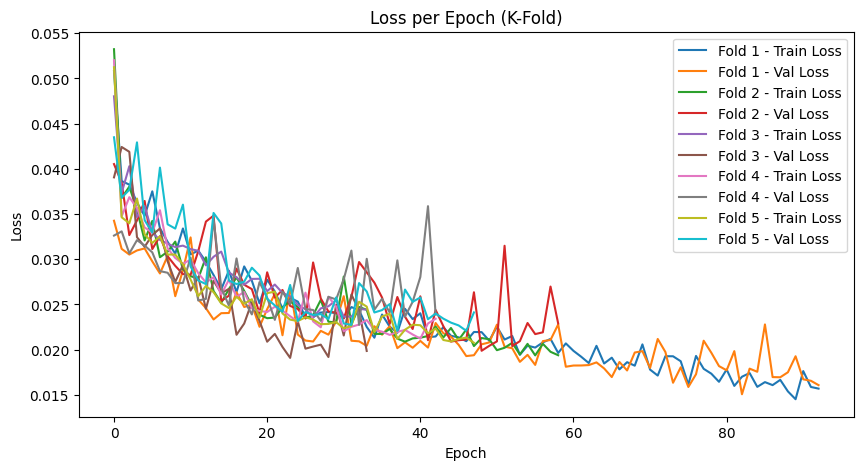

In [43]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

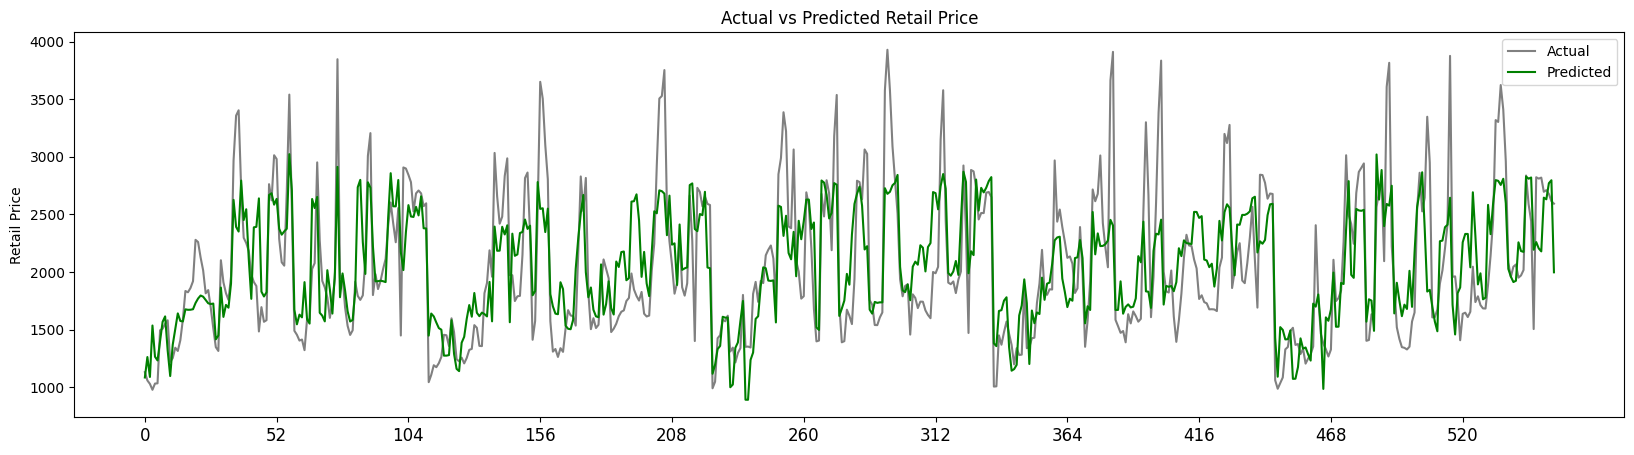

In [44]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### RNN

In [45]:
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# 데이터 준비
X = radish[['avgTemp', 'export volume ', 'market price', 'export value']].values
y = radish[['retail price']].values

# 데이터 정규화
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
y_scaled = scalerY.fit_transform(y)

# KFold 설정 (5개의 폴드 사용)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 1. 각 폴드별 MAE, MAPE, RMSE 저장 리스트
fold_mae_scores = []
fold_mape_scores = []
fold_rmse_scores = []
fold_histories = []  # 폴드별 학습 기록 저장 리스트
y_test_inverse_all = []  # 실제값 저장 리스트
y_pred_inverse_all = []  # 예측값 저장 리스트

# 2. K-fold 검증 루프
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
    print(f'Fold {fold + 1}')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_scaled[train_index], y_scaled[val_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # 모델 구성 및 학습
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(32, activation='tanh', input_shape=(X_train.shape[1], 1)))
    rnn_model.add(Dropout(0.1))
    rnn_model.add(Dense(1))

    optimizer = Adam(learning_rate=0.01)
    rnn_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=110, batch_size=10, verbose=2,
                        callbacks=[early_stopping])

    # 학습 기록 저장
    fold_histories.append(history.history)

    # 예측 및 역정규화
    y_val_pred = rnn_model.predict(X_val).flatten()
    y_val_pred_inverse = scalerY.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
    y_val_inverse = scalerY.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # 성능 지표 계산 및 저장
    mae = mean_absolute_error(y_val_inverse, y_val_pred_inverse)
    mape = mean_absolute_percentage_error(y_val_inverse, y_val_pred_inverse)
    rmse = np.sqrt(mean_squared_error(y_val_inverse, y_val_pred_inverse))

    print(f'Fold {fold + 1} - MAE: {mae:.4f}, MAPE: {mape:.4f}, RMSE: {rmse:.4f}')

    fold_mae_scores.append(mae)
    fold_mape_scores.append(mape)
    fold_rmse_scores.append(rmse)

    # 예측 및 실제값 저장
    y_test_inverse_all.append(y_val_inverse)
    y_pred_inverse_all.append(y_val_pred_inverse)

# 3. 평균 성능 출력
print(f'\nAverage MAE across all folds: {np.mean(fold_mae_scores):.4f}')
print(f'Average MAPE across all folds: {np.mean(fold_mape_scores):.4f}')
print(f'Average RMSE across all folds: {np.mean(fold_rmse_scores):.4f}')


Fold 1
Epoch 1/110


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 5s - 105ms/step - loss: 0.0676 - mae: 0.1974 - val_loss: 0.0299 - val_mae: 0.1384
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0378 - mae: 0.1577 - val_loss: 0.0366 - val_mae: 0.1396
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0403 - mae: 0.1582 - val_loss: 0.0305 - val_mae: 0.1387
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0364 - mae: 0.1537 - val_loss: 0.0302 - val_mae: 0.1321
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0377 - mae: 0.1558 - val_loss: 0.0324 - val_mae: 0.1319
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0365 - mae: 0.1527 - val_loss: 0.0292 - val_mae: 0.1276
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0363 - mae: 0.1529 - val_loss: 0.0336 - val_mae: 0.1378
Epoch 8/110
45/45 - 0s - 6ms/step - loss: 0.0347 - mae: 0.1471 - val_loss: 0.0316 - val_mae: 0.1396
Epoch 9/110
45/45 - 0s - 4ms/step - loss: 0.0367 - mae: 0.1539 - val_loss: 0.0314 - val_mae: 0.1321
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0367 - mae: 0.1518 - val_loss: 0.0301 - val_mae: 0.1345
Epoch 11/

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 35ms/step - loss: 0.0535 - mae: 0.1759 - val_loss: 0.0358 - val_mae: 0.1625
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0378 - mae: 0.1529 - val_loss: 0.0441 - val_mae: 0.1874
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0373 - mae: 0.1536 - val_loss: 0.0353 - val_mae: 0.1626
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0407 - mae: 0.1616 - val_loss: 0.0320 - val_mae: 0.1458
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0352 - mae: 0.1480 - val_loss: 0.0334 - val_mae: 0.1519
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0355 - mae: 0.1479 - val_loss: 0.0334 - val_mae: 0.1533
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0353 - mae: 0.1493 - val_loss: 0.0370 - val_mae: 0.1675
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0340 - mae: 0.1448 - val_loss: 0.0384 - val_mae: 0.1722
Epoch 9/110
45/45 - 0s - 2ms/step - loss: 0.0340 - mae: 0.1476 - val_loss: 0.0358 - val_mae: 0.1616
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0352 - mae: 0.1485 - val_loss: 0.0376 - val_mae: 0.1698
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 41ms/step - loss: 0.0704 - mae: 0.1918 - val_loss: 0.0458 - val_mae: 0.1547
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0382 - mae: 0.1500 - val_loss: 0.0345 - val_mae: 0.1476
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0379 - mae: 0.1538 - val_loss: 0.0433 - val_mae: 0.1573
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0349 - mae: 0.1451 - val_loss: 0.0368 - val_mae: 0.1485
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0356 - mae: 0.1499 - val_loss: 0.0401 - val_mae: 0.1478
Epoch 6/110
45/45 - 0s - 3ms/step - loss: 0.0350 - mae: 0.1474 - val_loss: 0.0369 - val_mae: 0.1469
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0341 - mae: 0.1458 - val_loss: 0.0403 - val_mae: 0.1482
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0341 - mae: 0.1444 - val_loss: 0.0376 - val_mae: 0.1467
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0333 - mae: 0.1427 - val_loss: 0.0420 - val_mae: 0.1501
Epoch 10/110
45/45 - 0s - 5ms/step - loss: 0.0357 - mae: 0.1481 - val_loss: 0.0344 - val_mae: 0.1454
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 50ms/step - loss: 0.0566 - mae: 0.1835 - val_loss: 0.0333 - val_mae: 0.1502
Epoch 2/110
45/45 - 0s - 4ms/step - loss: 0.0391 - mae: 0.1564 - val_loss: 0.0319 - val_mae: 0.1364
Epoch 3/110
45/45 - 0s - 4ms/step - loss: 0.0353 - mae: 0.1497 - val_loss: 0.0355 - val_mae: 0.1571
Epoch 4/110
45/45 - 0s - 5ms/step - loss: 0.0352 - mae: 0.1514 - val_loss: 0.0314 - val_mae: 0.1432
Epoch 5/110
45/45 - 0s - 6ms/step - loss: 0.0348 - mae: 0.1490 - val_loss: 0.0305 - val_mae: 0.1361
Epoch 6/110
45/45 - 0s - 4ms/step - loss: 0.0381 - mae: 0.1565 - val_loss: 0.0307 - val_mae: 0.1353
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0360 - mae: 0.1515 - val_loss: 0.0309 - val_mae: 0.1374
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0364 - mae: 0.1544 - val_loss: 0.0309 - val_mae: 0.1397
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0348 - mae: 0.1468 - val_loss: 0.0358 - val_mae: 0.1592
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0355 - mae: 0.1497 - val_loss: 0.0307 - val_mae: 0.1314
Epoch 11/1

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 - 2s - 44ms/step - loss: 0.0629 - mae: 0.1910 - val_loss: 0.0365 - val_mae: 0.1493
Epoch 2/110
45/45 - 0s - 3ms/step - loss: 0.0361 - mae: 0.1492 - val_loss: 0.0361 - val_mae: 0.1467
Epoch 3/110
45/45 - 0s - 3ms/step - loss: 0.0349 - mae: 0.1484 - val_loss: 0.0449 - val_mae: 0.1560
Epoch 4/110
45/45 - 0s - 3ms/step - loss: 0.0370 - mae: 0.1534 - val_loss: 0.0355 - val_mae: 0.1457
Epoch 5/110
45/45 - 0s - 3ms/step - loss: 0.0351 - mae: 0.1457 - val_loss: 0.0359 - val_mae: 0.1542
Epoch 6/110
45/45 - 0s - 6ms/step - loss: 0.0348 - mae: 0.1487 - val_loss: 0.0384 - val_mae: 0.1501
Epoch 7/110
45/45 - 0s - 3ms/step - loss: 0.0347 - mae: 0.1462 - val_loss: 0.0396 - val_mae: 0.1520
Epoch 8/110
45/45 - 0s - 3ms/step - loss: 0.0349 - mae: 0.1469 - val_loss: 0.0351 - val_mae: 0.1521
Epoch 9/110
45/45 - 0s - 3ms/step - loss: 0.0353 - mae: 0.1491 - val_loss: 0.0358 - val_mae: 0.1482
Epoch 10/110
45/45 - 0s - 3ms/step - loss: 0.0353 - mae: 0.1483 - val_loss: 0.0368 - val_mae: 0.1526
Epoch 11/1

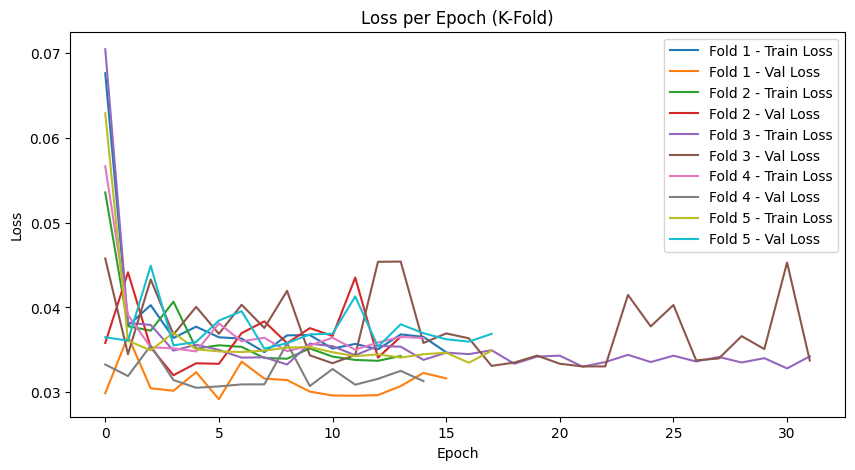

In [46]:
# 4. Loss 그래프
plt.figure(figsize=(10, 5))
for fold, history in enumerate(fold_histories):
    plt.plot(history['loss'], label=f'Fold {fold + 1} - Train Loss')
    plt.plot(history['val_loss'], label=f'Fold {fold + 1} - Val Loss')

plt.title('Loss per Epoch (K-Fold)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

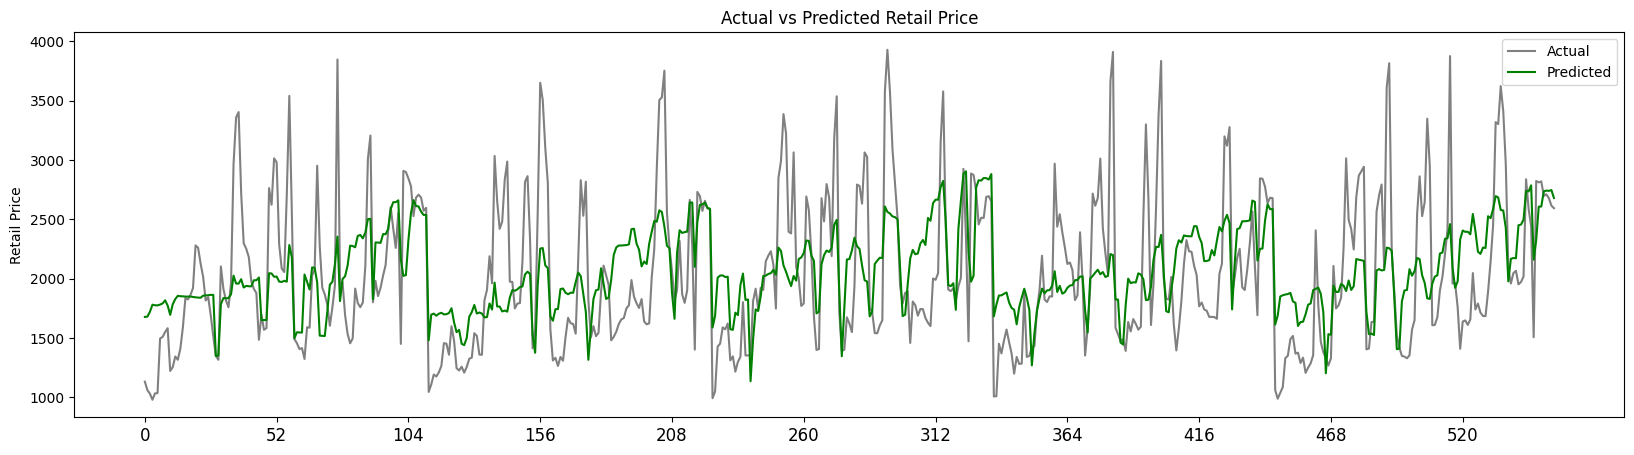

In [47]:
# 5. Actual vs Predicted 그래프
num_weeks = np.concatenate(y_test_inverse_all).shape[0]  # y_test_inverse_all의 길이로 num_weeks 정의

plt.figure(figsize=(20, 5))
plt.plot(np.concatenate(y_test_inverse_all), label='Actual', color='gray')
plt.plot(np.concatenate(y_pred_inverse_all), label='Predicted', color='green')
plt.title('Actual vs Predicted Retail Price')
plt.ylabel('Retail Price')

# X축 눈금 52주 간격으로 표시
plt.xticks(np.arange(0, num_weeks, step=52), fontsize=12)

plt.legend()
plt.show()

### shap value

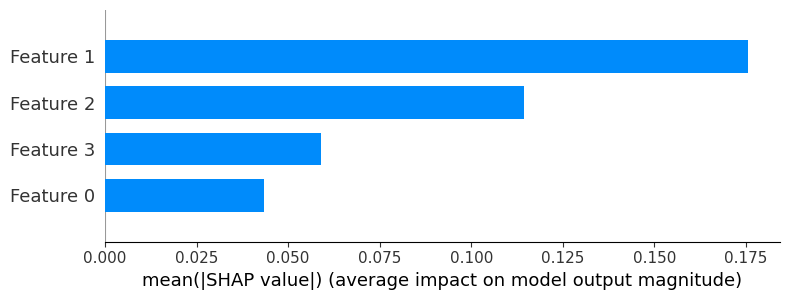

In [48]:
import shap

# 1. 해석하고자 하는 모델을 정규화된 데이터를 기반으로 SHAP 계산
explainer = shap.Explainer(lstm_model, X_scaled)  # rnn_model 사용
# SHAP 계산 (검증 데이터로 해석)
shap_values = explainer(X_val.reshape(X_val.shape[0], X_val.shape[1]))  # 2D 형태로 변환

# 2. SHAP 시각화
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]), plot_type='bar')

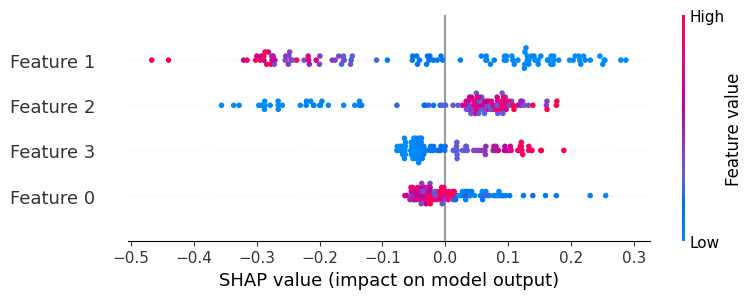

In [49]:
shap.summary_plot(shap_values, X_val.reshape(X_val.shape[0], X_val.shape[1]))

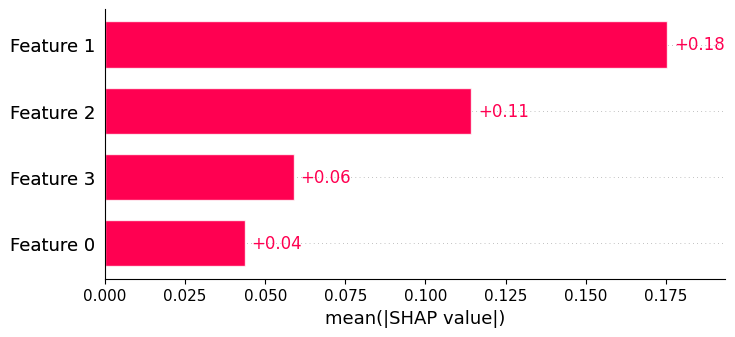

In [50]:
shap.plots.bar(shap_values)

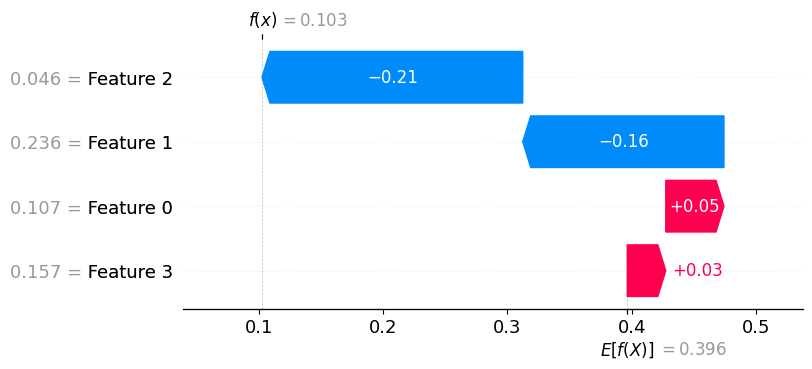

In [51]:
shap.plots.waterfall(shap_values[0])